In [2]:
import sys, os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import bayes_mvs as bayesest
import time

sys.path.insert(0, '../../PyEcoLib')
from simulator import Simulator


%matplotlib inline

In [89]:
mean_size = 1 # femto liter
doubling_time = 18 #min
tmax = 180 #min
sample_time = 2 #min
div_steps = 10 
ncells = 5000 

In [90]:
gr = np.log(2)/doubling_time 

In [12]:
if not os.path.exists('./data'):
    os.makedirs('./data') #data path
if not os.path.exists('./figures'):
    os.makedirs('./figures') #Figures path

In [5]:
start = time.time()
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = div_steps)
sim.divstrat(tmax = tmax, sample_time = 0.1*doubling_time, nameDSM = "./data/dataDSMadder.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
10%
20%
29%
39%
49%
59%
69%
79%
90%
100%
It took 6 seconds.


In [6]:
start = time.time()
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = div_steps,lamb = 2)
sim.divstrat(tmax = tmax, sample_time = 0.1*doubling_time, nameDSM = "./data/dataDSMsizer.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
10%
20%
29%
39%
49%
59%
69%
79%
90%
100%
It took 42 seconds.


In [7]:
start = time.time()
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = div_steps,lamb = 0.5)
sim.divstrat(tmax = tmax, sample_time = 0.1*doubling_time, nameDSM = "./data/dataDSMtimer.csv")
print('It took', np.int(time.time()-start), 'seconds.')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


Cells initialized
Cells initialized
10%
20%
29%
39%
49%
59%
69%
79%
90%
100%
It took 39 seconds.


In [8]:
start = time.time()
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = div_steps)
sim.szdyn(tmax = tmax, sample_time= 0.1*doubling_time, nameCRM = "./data/dataCRM1.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
1%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
It took 6 seconds.


In [9]:
CV2sz = 0.02
v0 = mean_size*np.random.gamma(shape=1/CV2sz,scale=CV2sz,size=ncells)

In [10]:
start = time.time()
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = div_steps,V0array=v0)
sim.szdyn(tmax = tmax, sample_time= 0.1*doubling_time, nameCRM = "./data/dataCRM2.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
1%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
It took 7 seconds.


In [9]:
CV2div = 0.002
CV2gr = 0.02

In [13]:
CV2div = 0.002
CV2gr = 0.02
start = time.time()
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = div_steps, CV2div = CV2div, CV2gr = CV2gr)
sim.szdyn(tmax = tmax, sample_time= 0.1*doubling_time, nameCRM = "./data/dataCRM3.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
1%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
It took 8 seconds.


In [4]:
data1=pd.read_csv("./data/dataCRM1.csv")
timearray1=data1.time.unique()

mnszarray1=[]
cvszarray1=[]
errcv2szarray1=[]
errmnszarray1=[]
df=data1
del df['time']
for m in range(len(df)):
    szs=df.loc[m, :].values.tolist()
    mean_cntr, var_cntr, std_cntr = bayesest(szs,alpha=0.95)
    mnszarray1.append(np.mean(szs))
    errmnszarray1.append(mean_cntr[1][1]-mean_cntr[0])
    cvszarray1.append(np.var(szs)/np.mean(szs)**2)
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2szarray1.append(errv)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1910: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1911: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


In [5]:
data1=pd.read_csv("./data/dataCRM2.csv")
timearray2=data1.time.unique()

mnszarray2=[]
cvszarray2=[]
errcv2szarray2=[]
errmnszarray2=[]
df=data1
del df['time']
for m in range(len(df)):
    szs=df.loc[m, :].values.tolist()
    mean_cntr, var_cntr, std_cntr = bayesest(szs,alpha=0.95)
    mnszarray2.append(np.mean(szs))
    errmnszarray2.append(mean_cntr[1][1]-mean_cntr[0])
    cvszarray2.append(np.var(szs)/np.mean(szs)**2)
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2szarray2.append(errv)

In [14]:
data1=pd.read_csv("./data/dataCRM3.csv")
timearray3=data1.time.unique()

mnszarray3=[]
cvszarray3=[]
errcv2szarray3=[]
errmnszarray3=[]
df=data1
del df['time']
for m in range(len(df)):
    szs=df.loc[m, :].values.tolist()
    mean_cntr, var_cntr, std_cntr = bayesest(szs,alpha=0.95)
    mnszarray3.append(np.mean(szs))
    errmnszarray3.append(mean_cntr[1][1]-mean_cntr[0])
    cvszarray3.append(np.var(szs)/np.mean(szs)**2)
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2szarray3.append(errv)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1910: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1911: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


In [16]:
start = time.time()
sim = Simulator(ncells=1, gr = gr, sb=mean_size, steps = div_steps)
sim.szdynFSP(tmax = tmax, nameFSP = "./data/dataFSP0.csv")
print('It took', np.int(time.time()-start), 'seconds.')

It took 86 seconds.


In [17]:
start = time.time()
CV2sz = 0.02
sim = Simulator(ncells=1, gr = gr, sb=mean_size, steps = div_steps)
sim.szdynFSP(tmax = tmax, nameFSP = "./data/dataFSP.csv",CV2sz=CV2sz)
print('It took', np.int(time.time()-start), 'seconds.')

6%
16%
26%
36%
46%
56%
66%
76%
86%
96%
It took 2397 seconds.


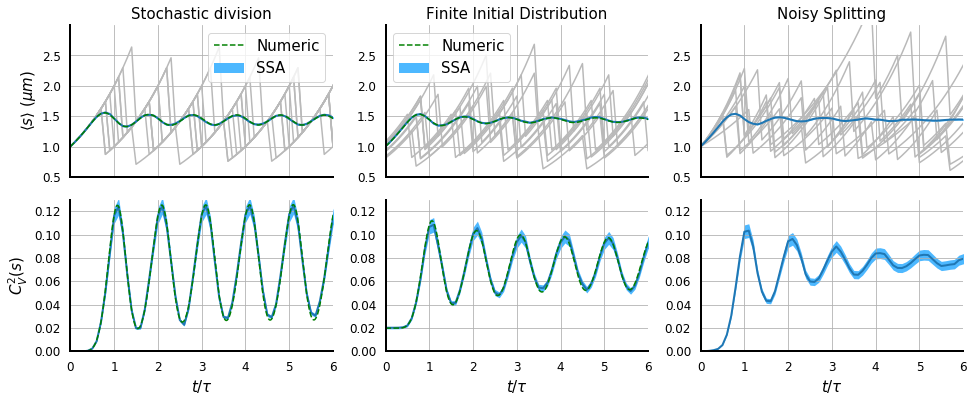

In [127]:
fig, ax = plt.subplots(2,3, figsize=(16,6),sharex=True)

data=pd.read_csv("./data/dataCRM1.csv")
tt=data.time
del data['time']
mmar=data.columns
for column in data.columns[0:10]:
    ax[0,0].plot(tt/doubling_time,data[column],c="#B9B9B9",label='_nolegend_')
    
data=pd.read_csv("./data/dataCRM2.csv")
tt=data.time
del data['time']
mmar=data.columns
for column in data.columns[0:10]:
    ax[0,1].plot(tt/doubling_time,data[column],c="#B9B9B9",label='_nolegend_')
    
data=pd.read_csv("./data/dataCRM3.csv")
tt=data.time
del data['time']
mmar=data.columns
for column in data.columns[0:10]:
    ax[0,2].plot(tt/doubling_time,data[column],c="#B9B9B9")
    
ax[0,0].plot(np.array(timearray1)/doubling_time,mnszarray1,lw=2)
ax[0,0].fill_between(np.array(timearray1)/doubling_time,np.array(mnszarray1)-np.array(errmnszarray1),np.array(mnszarray1)
                   +np.array(errmnszarray1),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")


ax[1,0].plot(np.array(timearray1)/doubling_time,cvszarray1,lw=2)
ax[1,0].fill_between(np.array(timearray1)/doubling_time,np.array(cvszarray1)-np.array(errcv2szarray1),np.array(cvszarray1)
                   +np.array(errcv2szarray1),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0)


ax[0,1].plot(np.array(timearray2)/doubling_time,mnszarray2,lw=2)
ax[0,1].fill_between(np.array(timearray2)/doubling_time,np.array(mnszarray2)-np.array(errmnszarray2),np.array(mnszarray2)
                   +np.array(errmnszarray2),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")
ax[1,1].plot(np.array(timearray2)/doubling_time,cvszarray2,lw=2)
ax[1,1].fill_between(np.array(timearray2)/doubling_time,np.array(cvszarray2)-np.array(errcv2szarray2),np.array(cvszarray2)
                   +np.array(errcv2szarray2),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0)


ax[0,2].plot(np.array(timearray3)/doubling_time,mnszarray3,lw=2)
ax[0,2].fill_between(np.array(timearray3)/doubling_time,np.array(mnszarray3)-np.array(errmnszarray3),np.array(mnszarray3)
                   +np.array(errmnszarray3),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")
ax[1,2].plot(np.array(timearray3)/doubling_time,cvszarray3,lw=2)
ax[1,2].fill_between(np.array(timearray3)/doubling_time,np.array(cvszarray3)-np.array(errcv2szarray3),np.array(cvszarray3)
                   +np.array(errcv2szarray3),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0)


ax[0,0].set_title("Stochastic division",fontsize=15)
ax[0,1].set_title("Finite Initial Distribution",fontsize=15)
ax[0,2].set_title("Noisy Splitting",fontsize=15)

data=pd.read_csv("./data/dataFSP.csv")
ax[0,1].plot(data.time/doubling_time,data.Meansize,ls='--',c='g',label="Numeric")
ax[1,1].plot(data.time/doubling_time,data.VarSize/data.Meansize**2,ls='--',c='g')

data=pd.read_csv("./data/dataFSP0.csv")
ax[0,0].plot(data.time/doubling_time,data.Meansize,ls='--',c='g',label="Numeric")
ax[1,0].plot(data.time/doubling_time,data.VarSize/data.Meansize**2,ls='--',c='g')

ax[0,0].legend(fontsize=15)
ax[0,1].legend(fontsize=15)

ax[0,0].set_ylabel(r"$\langle s\rangle$ $(\mu m)$",size=15)
ax[1,0].set_ylabel("$C_V^2(s)$",size=15)
ax[1,0].set_xlabel(r"$t/\tau$",size=15)
ax[1,1].set_xlabel(r"$t/\tau$",size=15)
ax[1,2].set_xlabel(r"$t/\tau$",size=15)

for l in [0,1]:
    for m in [0,1,2]:
        ax[l,m].set_xlim([0,6])
        taqui=np.arange(0,7,step=1)
        ax[l,m].set_xticks(np.array(taqui))
        ax[l,m].grid()
        ax[l,m].tick_params(axis='x', labelsize=12)
        ax[l,m].tick_params(axis='y', labelsize=12)
        for axis in ['bottom','left']:
            ax[l,m].spines[axis].set_linewidth(2)
            ax[l,m].tick_params(axis='both', width=2,length=6)
        for axis in ['top','right']:
            ax[l,m].spines[axis].set_linewidth(0)
            ax[l,m].tick_params(axis='both', width=0,length=6)
        taqui=np.arange(0,0.13,step=0.02)
        ax[1,m].set_yticks(np.array(taqui))
        taqui=np.arange(0.5,3,step=.5)
        ax[0,m].set_yticks(np.array(taqui))
        ax[1,m].set_ylim([0,0.13])
        ax[0,m].set_ylim([0.5,3])
plt.subplots_adjust(hspace=0.15,wspace=0.2)

#ax[1].plot(time4,np.array(allvarsz4),c='r')
#ax[0].plot(time4,mean_size*np.array(allmeansz4),c='r',label="Numeric")


plt.savefig('./figures/size_statistics_comp1.eps',bbox_inches='tight')
plt.savefig('./figures/size_statistics_comp1.svg',bbox_inches='tight')
plt.savefig('./figures/size_statistics_comp1.png',bbox_inches='tight')

In [19]:
data2=pd.read_csv("./data/dataDSMadder.csv")
data2=data2[data2.time>5*doubling_time]

quantnumber=5
pvadd2=data2

CV2darr1=[]
deltarr1=[]
sbarr1=[]
    
errcv2darr1=[]
errdeltarr1=[]
errsbarr1=[]
for i in range(quantnumber):
    lperv0=np.percentile(pvadd2.S_b,i*100/quantnumber)
    hperv0=np.percentile(pvadd2.S_b,(i+1)*100/quantnumber)
    quanta1=pvadd2[pvadd2.S_b>lperv0]
    quanta2=quanta1[quanta1.S_b<hperv0]     
    mean_cntr, var_cntr, std_cntr = bayesest((quanta2.S_d-quanta2.S_b)/np.mean(pvadd2.S_d-pvadd2.S_b),alpha=0.95)
    meanv0_cntr, varv0_cntr, stdv0_cntr = bayesest(quanta2.S_b/np.mean(pvadd2.S_b),alpha=0.95)
    CV2darr1.append(var_cntr[0]/mean_cntr[0]**2)
    deltarr1.append(mean_cntr[0])
    sbarr1.append(meanv0_cntr[0])
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2darr1.append(errv)
    errdeltarr1.append(mean_cntr[1][1]-mean_cntr[0])
    errsbarr1.append(meanv0_cntr[1][1]-meanv0_cntr[0])

In [20]:
data3=pd.read_csv("./data/dataDSMsizer.csv")
data3=data3[data3.time>5*doubling_time]

quantnumber=5
pvadd2=data3

CV2darr2=[]
deltarr2=[]
sbarr2=[]
    
errcv2darr2=[]
errdeltarr2=[]
errsbarr2=[]
for i in range(quantnumber):
    lperv0=np.percentile(pvadd2.S_b,i*100/quantnumber)
    hperv0=np.percentile(pvadd2.S_b,(i+1)*100/quantnumber)
    quanta1=pvadd2[pvadd2.S_b>lperv0]
    quanta2=quanta1[quanta1.S_b<hperv0]     
    mean_cntr, var_cntr, std_cntr = bayesest((quanta2.S_d-quanta2.S_b)/np.mean(pvadd2.S_d-pvadd2.S_b),alpha=0.95)
    meanv0_cntr, varv0_cntr, stdv0_cntr = bayesest(quanta2.S_b/np.mean(pvadd2.S_b),alpha=0.95)
    CV2darr2.append(var_cntr[0]/mean_cntr[0]**2)
    deltarr2.append(mean_cntr[0])
    sbarr2.append(meanv0_cntr[0])
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2darr2.append(errv)
    errdeltarr2.append(mean_cntr[1][1]-mean_cntr[0])
    errsbarr2.append(meanv0_cntr[1][1]-meanv0_cntr[0])

In [21]:
data4=pd.read_csv("./data/dataDSMtimer.csv")
data4=data4[data4.time>5*doubling_time]

quantnumber=5
pvadd2=data4

CV2darr3=[]
deltarr3=[]
sbarr3=[]
    
errcv2darr3=[]
errdeltarr3=[]
errsbarr3=[]
for i in range(quantnumber):
    lperv0=np.percentile(pvadd2.S_b,i*100/quantnumber)
    hperv0=np.percentile(pvadd2.S_b,(i+1)*100/quantnumber)
    quanta1=pvadd2[pvadd2.S_b>lperv0]
    quanta2=quanta1[quanta1.S_b<hperv0]     
    mean_cntr, var_cntr, std_cntr = bayesest((quanta2.S_d-quanta2.S_b)/np.mean(pvadd2.S_d-pvadd2.S_b),alpha=0.95)
    meanv0_cntr, varv0_cntr, stdv0_cntr = bayesest(quanta2.S_b/np.mean(pvadd2.S_b),alpha=0.95)
    CV2darr3.append(var_cntr[0]/mean_cntr[0]**2)
    deltarr3.append(mean_cntr[0])
    sbarr3.append(meanv0_cntr[0])
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    errcv2darr3.append(errv)
    errdeltarr3.append(mean_cntr[1][1]-mean_cntr[0])
    errsbarr3.append(meanv0_cntr[1][1]-meanv0_cntr[0])
print(np.mean(pvadd2.S_b))
print(np.mean(pvadd2.S_d-pvadd2.S_b))

0.9688601700000021
0.9513759149999949


In [24]:
sim = Simulator(ncells=1, gr = gr, sb=mean_size, steps = div_steps,lamb=0.5)
sbar=np.linspace(0.5,1.5,100)*mean_size
cv2tim=[]
delttim=[]
for i in sbar:
    Added,cv2=sim.SdStat(i)
    cv2tim.append(cv2)
    delttim.append(Added)


sim = Simulator(ncells=1, gr = gr, sb=mean_size, steps = div_steps)
sbar=np.linspace(0.5,1.5,100)*mean_size
cv2ad=[]
deltad=[]
for i in sbar:
    Added,cv2=sim.SdStat(i)
    cv2ad.append(cv2)
    deltad.append(Added)


sim = Simulator(ncells=1, gr = gr, sb=mean_size, steps = div_steps,lamb=2)
sbar=np.linspace(0.5,1.5,100)*mean_size
cv2sz=[]
deltsz=[]
for i in sbar:
    Added,cv2=sim.SdStat(i)
    cv2sz.append(cv2)
    deltsz.append(Added)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


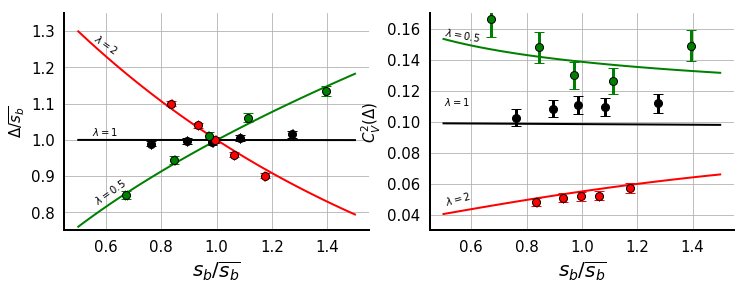

In [25]:

fig, ax = plt.subplots(1,2, figsize=(12,4))
#ax[0].scatter(data2.S_b/np.mean(data2.S_b),(data2.S_d-data2.S_b)/np.mean(data2.S_b),s=2)
#ax[0].scatter(data3.S_b/np.mean(data3.S_b),(data2.S_d-data3.S_b)/np.mean(data3.S_b),s=2)
#ax[0].scatter(data4.S_b/np.mean(data4.S_b),(data4.S_d-data2.S_b)/np.mean(data4.S_b),s=2)

ax[0].errorbar(np.array(sbarr1),np.array(deltarr1),xerr=errsbarr1,yerr=errdeltarr1, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='k')
ax[1].errorbar(np.array(sbarr1),CV2darr1,xerr=errsbarr1,yerr=errcv2darr1, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='k')

ax[0].errorbar(np.array(sbarr2),np.array(deltarr2),xerr=errsbarr2,yerr=errdeltarr2, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='r')
ax[1].errorbar(np.array(sbarr2),CV2darr2,xerr=errsbarr2,yerr=errcv2darr2, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='r')

ax[0].errorbar(np.array(sbarr3),np.array(deltarr3),xerr=errsbarr3,yerr=errdeltarr3, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='g')
ax[1].errorbar(np.array(sbarr3),CV2darr3,xerr=errsbarr3,yerr=errcv2darr3, fmt='o',mec='k',capsize=5,markersize='8',elinewidth=3,c='g')


ax[1].set_ylim([0,0.3])

ax[0].set_xlabel("$s_b/\overline{s_b}$",size=20)
ax[1].set_xlabel("$s_b/\overline{s_b}$",size=20)
ax[0].set_ylabel("$\Delta/\overline{s_b}$",size=15)
ax[1].set_ylabel("$C_V^2(\Delta)$",size=15)
#ax[0].set_xlim([0.5,1.5])
for l in [0,1]:
    #ax[l].set_xlim([0.2,2])
    ax[l].grid()
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=0,length=6)

    
ax[0].plot(np.array(sbar)/mean_size, np.array(delttim)/mean_size, lw=2,c='g',label="$\lambda=0.5$")
ax[1].plot(np.array(sbar)/mean_size, cv2tim, lw=2,c='g')

ax[0].plot(np.array(sbar)/mean_size, np.array(deltad)/mean_size, lw=2,c='k',label="$\lambda=1$")
ax[1].plot(np.array(sbar)/mean_size, cv2ad, lw=2,c='k')

ax[0].plot(np.array(sbar)/mean_size, np.array(deltsz)/mean_size, lw=2,c='r',label="$\lambda=2$")
ax[1].plot(np.array(sbar)/mean_size, cv2sz, lw=2,c='r')

ax[0].set_ylim(0.75,1.35)
ax[1].set_ylim(0.03,0.17)
ax[0].text(0.55,1.27,"$\lambda = 2$",rotation=-35,fontsize=10)
ax[0].text(0.55,1.01,"$\lambda = 1$",fontsize=10)
ax[0].text(0.55,0.87,"$\lambda = 0.5$",rotation=35,fontsize=10)

ax[1].text(0.5,0.05,"$\lambda = 2$",rotation=15,fontsize=10)
ax[1].text(0.5,0.11,"$\lambda = 1$",fontsize=10)
ax[1].text(0.5,0.155,"$\lambda = 0.5$",rotation=-10,fontsize=10)

#ax[0].set_ylim([0.7,1.5])

plt.savefig('./figures/div_strategy.eps',bbox_inches='tight')
plt.savefig('./figures/div_strategy.svg',bbox_inches='tight')
plt.savefig('./figures/div_strategy.png',bbox_inches='tight')

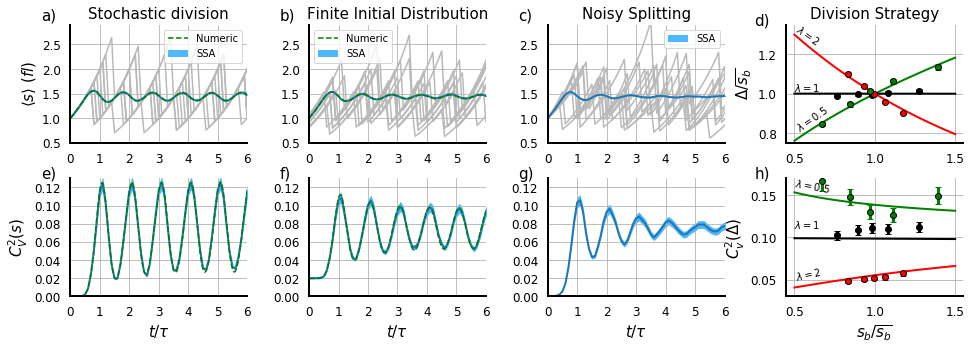

In [26]:
fig, ax = plt.subplots(2,4, figsize=(16,5))

data=pd.read_csv("./data/dataCRM1.csv")
tt=data.time
del data['time']
for column in data.columns[0:10]:
    ax[0,0].plot(tt/doubling_time,data[column],c="#B9B9B9",label='_nolegend_')
    
data=pd.read_csv("./data/dataCRM2.csv")
tt=data.time
del data['time']
for column in data.columns[0:10]:
    ax[0,1].plot(tt/doubling_time,data[column],c="#B9B9B9",label='_nolegend_')
    
data=pd.read_csv("./data/dataCRM3.csv")
tt=data.time
del data['time']
for column in data.columns[0:10]:
    ax[0,2].plot(tt/doubling_time,data[column],c="#B9B9B9",label='_nolegend_')
    
ax[0,0].plot(np.array(timearray1)/doubling_time,mnszarray1,lw=2)
ax[0,0].fill_between(np.array(timearray1)/doubling_time,np.array(mnszarray1)-np.array(errmnszarray1),np.array(mnszarray1)
                   +np.array(errmnszarray1),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")


ax[1,0].plot(np.array(timearray1)/doubling_time,cvszarray1,lw=2)
ax[1,0].fill_between(np.array(timearray1)/doubling_time,np.array(cvszarray1)-np.array(errcv2szarray1),np.array(cvszarray1)
                   +np.array(errcv2szarray1),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0)


ax[0,1].plot(np.array(timearray2)/doubling_time,mnszarray2,lw=2)
ax[0,1].fill_between(np.array(timearray2)/doubling_time,np.array(mnszarray2)-np.array(errmnszarray2),np.array(mnszarray2)
                   +np.array(errmnszarray2),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")
ax[1,1].plot(np.array(timearray2)/doubling_time,cvszarray2,lw=2)
ax[1,1].fill_between(np.array(timearray2)/doubling_time,np.array(cvszarray2)-np.array(errcv2szarray2),np.array(cvszarray2)
                   +np.array(errcv2szarray2),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0)


ax[0,2].plot(np.array(timearray3)/doubling_time,mnszarray3,lw=2)
ax[0,2].fill_between(np.array(timearray3)/doubling_time,np.array(mnszarray3)-np.array(errmnszarray3),np.array(mnszarray3)
                   +np.array(errmnszarray3),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0,label="SSA")
ax[1,2].plot(np.array(timearray3)/doubling_time,cvszarray3,lw=2)
ax[1,2].fill_between(np.array(timearray3)/doubling_time,np.array(cvszarray3)-np.array(errcv2szarray3),np.array(cvszarray3)
                   +np.array(errcv2szarray3),alpha=1, edgecolor='#4db8ff', facecolor='#4db8ff',linewidth=0)


#ax[0].set_ylim([1,1.7])
#ax[1].set_ylim([0,0.15])



ax[0,0].set_title("Stochastic division",fontsize=15)
ax[0,1].set_title("Finite Initial Distribution",fontsize=15)
ax[0,2].set_title("Noisy Splitting",fontsize=15)

data=pd.read_csv("./data/dataFSP.csv")
ax[0,1].plot(data.time/doubling_time,data.Meansize,ls='--',c='g',label="Numeric")
ax[1,1].plot(data.time/doubling_time,data.VarSize/data.Meansize**2,ls='--',c='g')

data=pd.read_csv("./data/dataFSP0.csv")
ax[0,0].plot(data.time/doubling_time,data.Meansize,ls='--',c='g',label="Numeric")
ax[1,0].plot(data.time/doubling_time,data.VarSize/data.Meansize**2,ls='--',c='g')

ax[0,0].legend(fontsize=10)
ax[0,1].legend(fontsize=10)
ax[0,2].legend(fontsize=10)
#ax[0,1].legend(fontsize=10)


ax[0,3].errorbar(np.array(sbarr1),np.array(deltarr1),xerr=errsbarr1,yerr=errdeltarr1, fmt='o',mec='k',capsize=3,markersize='6',elinewidth=3,c='k')
ax[1,3].errorbar(np.array(sbarr1),CV2darr1,xerr=errsbarr1,yerr=errcv2darr1, fmt='o',mec='k',capsize=3,markersize='6',elinewidth=3,c='k')

ax[0,3].errorbar(np.array(sbarr2),np.array(deltarr2),xerr=errsbarr2,yerr=errdeltarr2, fmt='o',mec='k',capsize=3,markersize='6',elinewidth=3,c='r')
ax[1,3].errorbar(np.array(sbarr2),CV2darr2,xerr=errsbarr2,yerr=errcv2darr2, fmt='o',mec='k',capsize=3,markersize='6',elinewidth=3,c='r')

ax[0,3].errorbar(np.array(sbarr3),np.array(deltarr3),xerr=errsbarr3,yerr=errdeltarr3, fmt='o',mec='k',capsize=3,markersize='6',elinewidth=3,c='g')
ax[1,3].errorbar(np.array(sbarr3),CV2darr3,xerr=errsbarr3,yerr=errcv2darr3, fmt='o',mec='k',capsize=3,markersize='6',elinewidth=3,c='g')



ax[0,3].plot(np.array(sbar)/mean_size, np.array(delttim)/mean_size, lw=2,c='g',label="$\lambda=0.5$")
ax[1,3].plot(np.array(sbar)/mean_size, cv2tim, lw=2,c='g')

ax[0,3].plot(np.array(sbar)/mean_size, np.array(deltad)/mean_size, lw=2,c='k',label="$\lambda=1$")
ax[1,3].plot(np.array(sbar)/mean_size, cv2ad, lw=2,c='k')

ax[0,3].plot(np.array(sbar)/mean_size, np.array(deltsz)/mean_size, lw=2,c='r',label="$\lambda=2$")
ax[1,3].plot(np.array(sbar)/mean_size, cv2sz, lw=2,c='r')


ax[0,0].set_ylabel(r"$\langle s\rangle$ $(fl)$",size=15)
ax[1,0].set_ylabel("$C_V^2(s)$",size=15)
ax[1,0].set_xlabel(r"$t/\tau$",size=15)
ax[1,1].set_xlabel(r"$t/\tau$",size=15)
ax[1,2].set_xlabel(r"$t/\tau$",size=15)
ax[1,3].set_xlabel(r"$s_b/\overline{s_b}$",size=15)
#ax[0].set_ylim([1,1.7])
#ax[1].set_ylim([0,0.15])


for l in [0,1]:
    for m in [0,1,2,3]:
        
        ax[l,m].grid()
        ax[l,m].tick_params(axis='x', labelsize=12)
        ax[l,m].tick_params(axis='y', labelsize=12)
        for axis in ['bottom','left']:
            ax[l,m].spines[axis].set_linewidth(2)
            ax[l,m].tick_params(axis='both', width=2,length=6)
        for axis in ['top','right']:
            ax[l,m].spines[axis].set_linewidth(0)
            ax[l,m].tick_params(axis='both', width=0,length=6)
        if m !=3:
            ax[l,m].set_xlim([0,6])
            taqui=np.arange(0,7,step=1)
            ax[l,m].set_xticks(np.array(taqui))
            taqui=np.arange(0,0.13,step=0.02)
            ax[1,m].set_yticks(np.array(taqui))
            taqui=np.arange(0.5,3.5,step=0.5)
            ax[0,m].set_yticks(np.array(taqui))
            ax[1,m].set_ylim([0,0.13])
            ax[0,m].set_ylim([0.5,2.9])
plt.subplots_adjust(hspace=0.3,wspace=0.35)

if not os.path.exists('./figures'):
    os.makedirs('./figures')
ax[0,0].set_title("Stochastic division",fontsize=15)
ax[0,1].set_title("Finite Initial Distribution",fontsize=15)
ax[0,2].set_title("Noisy Splitting",fontsize=15)
ax[0,3].set_title("Division Strategy",fontsize=15)
#ax[0,3].legend(fontsize = 10)
ax[0,3].set_ylim(0.75,1.35)
ax[1,3].set_ylim(0.03,0.17)
ax[0,3].text(0.5,1.31,"$\lambda = 2$",rotation=-35,fontsize=10)
ax[0,3].text(0.5,1.01,"$\lambda = 1$",fontsize=10)
ax[0,3].text(0.5,0.9,"$\lambda = 0.5$",rotation=35,fontsize=10)

ax[1,3].text(0.5,0.055,"$\lambda = 2$",rotation=12,fontsize=10)
ax[1,3].text(0.5,0.11,"$\lambda = 1$",fontsize=10)
ax[1,3].text(0.5,0.16,"$\lambda = 0.5$",rotation=-10,fontsize=10)




ax[0,3].set_ylabel(r"$\Delta/\overline{s_b}$",size=15)

ax[1,3].set_ylabel(r"$C_v^2(\Delta)$",size=15)

#ax[0].legend(fontsize=15)

#ax[1].plot(time4,np.array(allvarsz4),c='r')
#ax[0].plot(time4,mean_size*np.array(allmeansz4),c='r',label="Numeric")
ax[0,0].text(-1,3,"a)",fontsize=15)
ax[0,1].text(-1,3.,"b)",fontsize=15)
ax[0,2].text(-1,3.,"c)",fontsize=15)
ax[1,0].text(-1,0.13,"e)",fontsize=15)
ax[1,1].text(-1,0.13,"f)",fontsize=15)
ax[1,2].text(-1,0.13,"g)",fontsize=15)
ax[0,3].text(0.25,1.35,"d)",fontsize=15)
ax[1,3].text(0.25,0.17,"h)",fontsize=15)

plt.savefig('./figures/size_statistics_comparison.svg',bbox_inches='tight')
plt.savefig('./figures/size_statistics_comparison.png',bbox_inches='tight')
plt.savefig('./figures/size_statistics_comparison.eps',bbox_inches='tight')

In [91]:
data=pd.read_csv("./data/dataCRM1.csv")
taumax=50
tauarr1=range(taumax)
tarr=data.time.tolist()
corarr1=[]
for tau in tauarr1:
    xx=[]
    yy=[]
    for i in range(len(tarr)-tau):
        df=data[data.time==tarr[i]]
        del df['time']
        df2=data[data.time==tarr[i+tau]]
        del df2['time']
        #print(df.iloc[0].tolist())
        A=df.iloc[0].tolist()
        B=df2.iloc[0].tolist()
        for m in range(len(A)):
            xx.append(A[m])
        for m in range(len(A)):
            yy.append(B[m])
        #xx.append()
        #yy.append(df2.tolist())
    corarr1.append(np.corrcoef(xx,yy)[0][1])
    #print()
    
    

In [92]:
data=pd.read_csv("./data/dataCRM2.csv")
taumax=50
tauarr2=range(taumax)
tarr=data.time.tolist()
corarr2=[]
for tau in tauarr2:
    xx=[]
    yy=[]
    for i in range(len(tarr)-tau):
        df=data[data.time==tarr[i]]
        del df['time']
        df2=data[data.time==tarr[i+tau]]
        del df2['time']
        #print(df.iloc[0].tolist())
        A=df.iloc[0].tolist()
        B=df2.iloc[0].tolist()
        for m in range(len(A)):
            xx.append(A[m])
        for m in range(len(A)):
            yy.append(B[m])
        #xx.append()
        #yy.append(df2.tolist())
    corarr2.append(np.corrcoef(xx,yy)[0][1])

In [93]:
start = time.time()
CV2sz = 0.02
v0 = mean_size*np.random.gamma(shape=1/CV2sz,scale=CV2sz,size=ncells)
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = 10,V0array=v0)
sim.szdyn(tmax = tmax, sample_time= 0.1*doubling_time, nameCRM = "./data/dataCRM10stp.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
1%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
It took 8 seconds.


In [94]:
data=pd.read_csv("./data/dataCRM10stp.csv")
taumax=50
tauarr10=range(taumax)
tarr=data.time.tolist()
corarr10=[]
for tau in tauarr10:
    xx=[]
    yy=[]
    for i in range(len(tarr)-tau):
        df=data[data.time==tarr[i]]
        del df['time']
        df2=data[data.time==tarr[i+tau]]
        del df2['time']
        #print(df.iloc[0].tolist())
        A=df.iloc[0].tolist()
        B=df2.iloc[0].tolist()
        for m in range(len(A)):
            xx.append(A[m])
        for m in range(len(A)):
            yy.append(B[m])
        #xx.append()
        #yy.append(df2.tolist())
    corarr10.append(np.corrcoef(xx,yy)[0][1])

In [95]:
start = time.time()
CV2sz = 0.02
v0 = mean_size*np.random.gamma(shape=1/CV2sz,scale=CV2sz,size=ncells)
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = 50,V0array=v0)
sim.szdyn(tmax = tmax, sample_time= 0.1*doubling_time, nameCRM = "./data/dataCRM50stp.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
1%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
It took 32 seconds.


In [96]:
data=pd.read_csv("./data/dataCRM50stp.csv")
taumax=50
tauarr50=range(taumax)
tarr=data.time.tolist()
corarr50=[]
for tau in tauarr50:
    xx=[]
    yy=[]
    for i in range(len(tarr)-tau):
        df=data[data.time==tarr[i]]
        del df['time']
        df2=data[data.time==tarr[i+tau]]
        del df2['time']
        #print(df.iloc[0].tolist())
        A=df.iloc[0].tolist()
        B=df2.iloc[0].tolist()
        for m in range(len(A)):
            xx.append(A[m])
        for m in range(len(A)):
            yy.append(B[m])
        #xx.append()
        #yy.append(df2.tolist())
    corarr50.append(np.corrcoef(xx,yy)[0][1])

In [97]:
start = time.time()
CV2sz = 0.02
v0 = mean_size*np.random.gamma(shape=1/CV2sz,scale=CV2sz,size=ncells)
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = 1,V0array=v0)
sim.szdyn(tmax = tmax, sample_time= 0.1*doubling_time, nameCRM = "./data/dataCRM1stp.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
1%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
It took 4 seconds.


In [98]:
data=pd.read_csv("./data/dataCRM1stp.csv")
taumax=50
tauarr1stp=range(taumax)
tarr=data.time.tolist()
corarr1stp=[]
for tau in tauarr1stp:
    xx=[]
    yy=[]
    for i in range(len(tarr)-tau):
        df=data[data.time==tarr[i]]
        del df['time']
        df2=data[data.time==tarr[i+tau]]
        del df2['time']
        #print(df.iloc[0].tolist())
        A=df.iloc[0].tolist()
        B=df2.iloc[0].tolist()
        for m in range(len(A)):
            xx.append(A[m])
        for m in range(len(A)):
            yy.append(B[m])
        #xx.append()
        #yy.append(df2.tolist())
    corarr1stp.append(np.corrcoef(xx,yy)[0][1])

In [99]:
start = time.time()
CV2sz = 0.02
v0 = mean_size*np.random.gamma(shape=1/CV2sz,scale=CV2sz,size=ncells)
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = 50,V0array=v0,CV2div=0.005,CV2gr=0.02)
sim.szdyn(tmax = tmax, sample_time= 0.1*doubling_time, nameCRM = "./data/dataCRM50stpns.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
1%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
It took 26 seconds.


In [100]:
data=pd.read_csv("./data/dataCRM50stpns.csv")
taumax=50
tauarr50ns=range(taumax)
tarr=data.time.tolist()
corarr50ns=[]
for tau in tauarr50ns:
    xx=[]
    yy=[]
    for i in range(len(tarr)-tau):
        df=data[data.time==tarr[i]]
        del df['time']
        df2=data[data.time==tarr[i+tau]]
        del df2['time']
        #print(df.iloc[0].tolist())
        A=df.iloc[0].tolist()
        B=df2.iloc[0].tolist()
        for m in range(len(A)):
            xx.append(A[m])
        for m in range(len(A)):
            yy.append(B[m])
        #xx.append()
        #yy.append(df2.tolist())
    corarr50ns.append(np.corrcoef(xx,yy)[0][1])

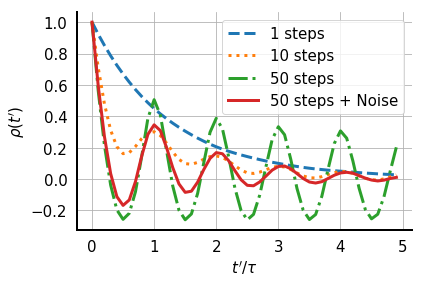

In [101]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
plt.plot(1.8*np.array(tauarr1stp)/18,corarr1stp,lw=3,ls="--",label="1 steps")
#plt.plot(1.8*np.array(tauarr2)/18,corarr2,lw=3,ls=":",label="Finite initial variance")

plt.plot(1.8*np.array(tauarr10)/18,corarr10,lw=3,label="10 steps",ls=":")
plt.plot(1.8*np.array(tauarr50)/18,corarr50,lw=3,label="50 steps",ls="-.")
plt.plot(1.8*np.array(tauarr50ns)/18,corarr50ns,lw=3,label="50 steps + Noise")

plt.grid()
ax.set_ylabel(r"$\rho(t')$",fontsize=15)
ax.set_xlabel(r"$t'/\tau$",fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
plt.legend(fontsize=15)
#x=np.linspace(0,5,30)
#plt.plot(x,np.exp(-x*np.log(2)))
plt.savefig('./figures/size_autocorrelation.svg',bbox_inches='tight')
plt.savefig('./figures/size_autocorrelation.png',bbox_inches='tight')
plt.savefig('./figures/size_autocorrelation.eps',bbox_inches='tight')

In [102]:
CV2div = 0.002
CV2gr = 0.02
tmax=15*doubling_time
ncells=10000
start = time.time()
sim = Simulator(ncells=ncells, gr = gr, sb=mean_size, steps = div_steps, CV2div = CV2div, CV2gr = CV2gr)
sim.szdyn(tmax = tmax, sample_time= 0.1*doubling_time, nameCRM = "./data/dataCRM4.csv")
print('It took', np.int(time.time()-start), 'seconds.')

Cells initialized
Cells initialized
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
It took 31 seconds.


[Text(0,0.5,'$\\rho(s)$'), Text(0.5,0,'Size (fl)')]

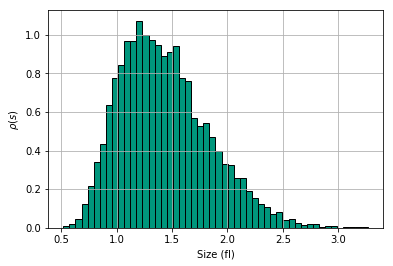

In [103]:
import seaborn as sns
fig, ax = plt.subplots(1,1, figsize=(6,4))
data=pd.read_csv("./data/dataCRM4.csv")
df=data.iloc[len(data)-1]
del df['time']
sns.distplot(df,norm_hist=True,kde=False,color='#00967C',hist_kws=dict(alpha=1,edgecolor='k'),kde_kws={'linewidth': 1},bins=50)
plt.grid()
ax.set(xlabel='Size (fl)', ylabel=r'$\rho(s)$')

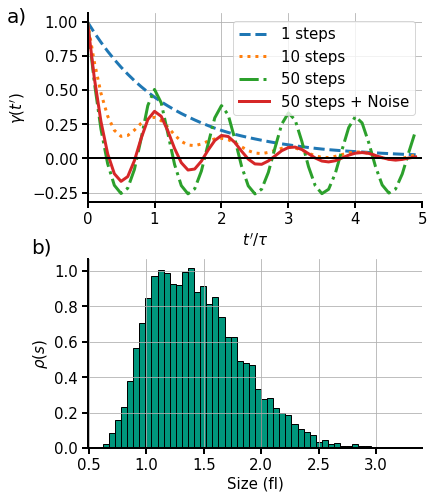

In [126]:
fig, ax = plt.subplots(2,1, figsize=(6,8))
ax[0].plot(1.8*np.array(tauarr1stp)/18,corarr1stp,lw=3,ls="--",label="1 steps")
#plt.plot(1.8*np.array(tauarr2)/18,corarr2,lw=3,ls=":",label="Finite initial variance")

ax[0].plot(1.8*np.array(tauarr10)/18,corarr10,lw=3,label="10 steps",ls=":")
ax[0].plot(1.8*np.array(tauarr50)/18,corarr50,lw=3,label="50 steps",ls="-.")
ax[0].plot(1.8*np.array(tauarr50ns)/18,corarr50ns,lw=3,label="50 steps + Noise")


ax[0].set_ylabel(r"$\gamma(t')$",fontsize=15)
ax[0].set_xlabel(r"$t'/\tau$",fontsize=15)
for l in [0,1]:
    ax[l].grid()
    ax[l].tick_params(axis='x', labelsize=15)
    ax[l].tick_params(axis='y', labelsize=15)
    for axis in ['bottom','left']:
        ax[l].spines[axis].set_linewidth(2)
        ax[l].tick_params(axis='both', width=2,length=6)
    for axis in ['top','right']:
        ax[l].spines[axis].set_linewidth(0)
        ax[l].tick_params(axis='both', width=2,length=6)
ax[0].legend(fontsize=15)
ax[0].set_xlim(0,5)
#for axis in ['bottom']:
#    ax[0].spines[axis].set_linewidth(0)
#    ax[0].tick_params(axis='both', width=0,length=6)
data=pd.read_csv("./data/dataCRM3.csv")
df=data.iloc[len(data)-1]
del df['time']
sns.distplot(df,norm_hist=True,kde=False,color='#00967C',hist_kws=dict(alpha=1,edgecolor='k'),ax=ax[1],kde_kws={'linewidth': 1},bins=50)
ax[1].set_ylabel(r'$\rho(s)$',fontsize=15)
ax[1].set_xlabel('Size (fl)',fontsize=15)
ax[0].plot([0,5],[0,0],c='k',lw=2)
ax[0].text(-1.2,1,"a)",fontsize=20)
ax[1].text(0.0,1.1,"b)",fontsize=20)
#ax[1].set(xlabel='Size (fl)', ylabel=)
plt.subplots_adjust(hspace=0.3,wspace=0.2)
#x=np.linspace(0,5,30)
#plt.plot(x,np.exp(-x*np.log(2)))
plt.savefig('./figures/mergedfig.svg',bbox_inches='tight')
plt.savefig('./figures/mergedfig.png',bbox_inches='tight')
plt.savefig('./figures/mergedfig.eps',bbox_inches='tight')